# Fisher's Linear Discriminant

In [2]:
import numpy as np 
np.set_printoptions(suppress=True)
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import datasets


Since it is largely geometric, the Linear Discriminant won't look like other methods we've seen (no gradients!). First we take the class means and calculate $\bSigma_w$ as described in the {doc}`concept section </content/c3/s2/fisher_discriminant>`. Estimating $\bbetahat$ is then as simple as calculating $\bSigma_w^{-1}(\bmu_1 - \bmu_0)$. Let's demonstrate the model using the {doc}`breast cancer </content/appendix/data>` dataset.

In [3]:
# import data
cancer = datasets.load_breast_cancer()
X = cancer['data']
y = cancer['target']

```{note}
Note that the value we return for each observation, $f(\bx_n)$, is not a fitted value. Instead, we look at the distribution of the $f(\bx_n)$ by class and determine a classification rule based on this distribution. For instance, we might predict observation $n$ came from class 1 if $f(\bx_n) \geq c$ (for some constant c) and from class 0 otherwise. 
```

In [4]:
class FisherLinearDiscriminant:
    
    def fit(self, X, y):
        ## Save stuff
        self.X = X
        self.y = y
        self.N, self.D = self.X.shape
        
        ## Calculate class means
        X0 = X[y == 0]
        X1 = X[y == 1]
        mu0 = X0.mean(0)
        mu1 = X1.mean(0)
        
        ## Sigma_w
        Sigma_w = np.empty((self.D, self.D))
        for x0 in X0:
            x0_minus_mu0 = (x0 - mu0).reshape(-1, 1)
            Sigma_w += np.dot(x0_minus_mu0, x0_minus_mu0.T)
        for x1 in X1:
            x1_minus_mu1 = (x1 - mu1).reshape(-1, 1)
            Sigma_w += np.dot(x1_minus_mu1, x1_minus_mu1.T)            
        Sigma_w_inverse = np.linalg.inv(Sigma_w)
        
        ## Beta
        self.beta = np.dot(Sigma_w_inverse, mu1 - mu0)
        self.f = np.dot(X, self.beta)

We can now fit the model on the {doc}`breast cancer </content/appendix/data>` dataset, as below.

In [5]:
model = FisherLinearDiscriminant()
model.fit(X, y);

Once we have fit the model, we can look at the distribution of $f(\bx_n)$ by class. We hope to see a significant separation between classes and a significant clustering within classes. The histogram below shows that we've nearly separated the two classes and the two classes are decently clustered. We would presumably choose a cutoff somewhere between $f(x) = -.09$ and $f(x) = -.08$.

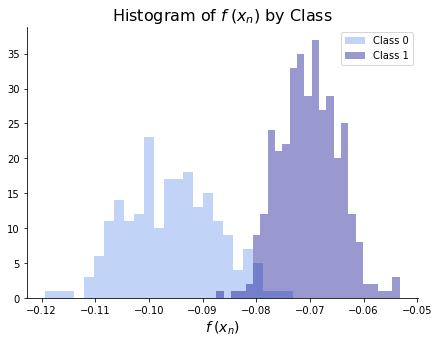

In [6]:
fig, ax = plt.subplots(figsize = (7,5))
sns.distplot(model.f[model.y == 0], bins = 25, kde = False, 
             color = 'cornflowerblue', label = 'Class 0')
sns.distplot(model.f[model.y == 1], bins = 25, kde = False, 
             color = 'darkblue', label = 'Class 1')
ax.set_xlabel(r"$f\hspace{.25}(x_n)$", size = 14)
ax.set_title(r"Histogram of $f\hspace{.25}(x_n)$ by Class", size = 16)
ax.legend()
sns.despine()